In [42]:
import os
import cv2
import json
import random
import imutils
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
with open('img_04718.json') as f:
    box = json.load(f)['boxes'][0]
box

{'h': 492, 'w': 224, 'x': 377, 'y': 537}

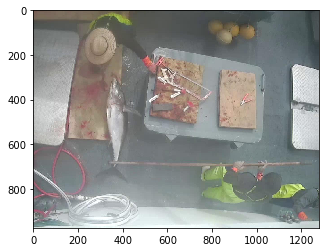

In [21]:
img = cv2.imread('img_04718.jpg')
plt.imshow(imutils.opencv2matplotlib(img))

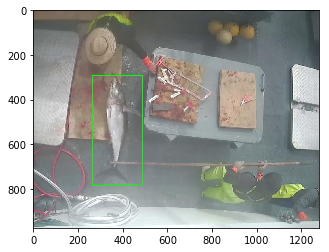

In [23]:
with_box = img.copy()
start_x = box['x'] - int((box['w'] / 2))
start_y = box['y'] - int((box['h'] / 2))
end_x = box['x'] + int((box['w'] / 2))
end_y = box['y'] + int((box['h'] / 2))
cv2.rectangle(with_box, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

plt.imshow(imutils.opencv2matplotlib(with_box))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2ee3f565c0>,
 <matplotlib.image.AxesImage at 0x7f2ee3eddf28>)

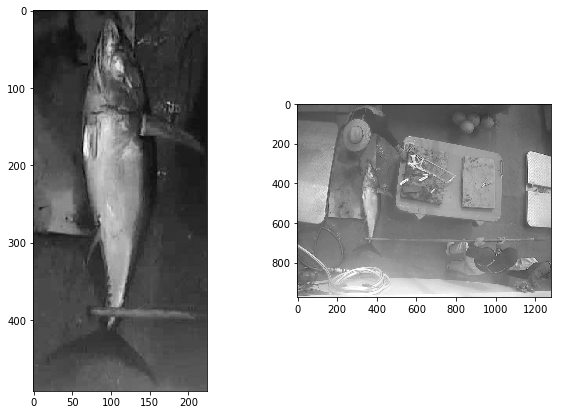

In [35]:
im_array = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

template = np.zeros([ end_y - start_y, end_x - start_x], dtype='uint8')
template[:, :] = im_array[start_y:end_y, start_x:end_x]

plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

../train/BET/img_00225.jpg


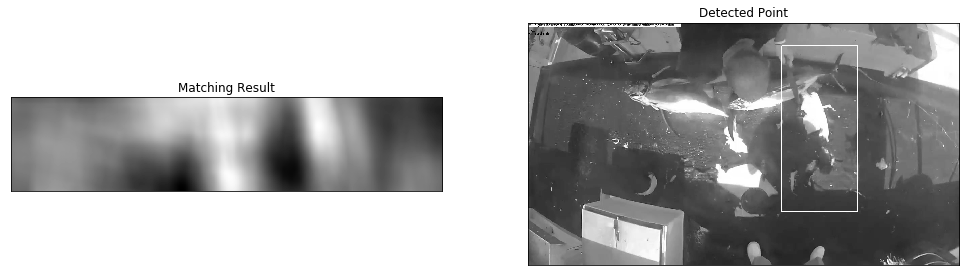

In [84]:
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
print(file)

img = cv2.imread(file, 0)
w, h = template.shape[::-1]

# Apply template Matching
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

fig, ax = plt.subplots(figsize=(17, 7))
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

../train/BET/img_02206.jpg


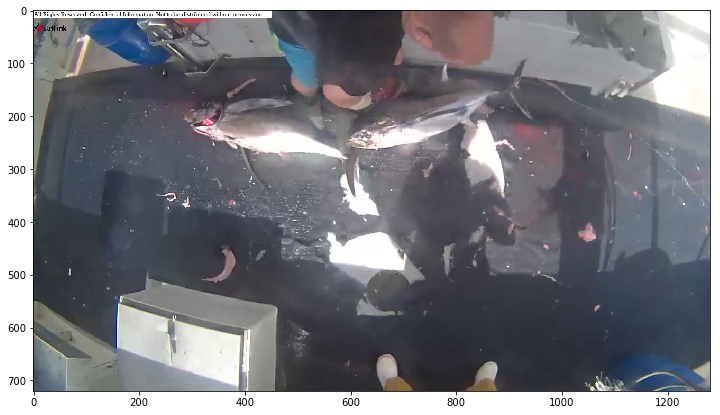

In [147]:
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
print(file)

img = cv2.imread(file)
# img = cv2.imread('img_04718.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

# Apply template Matching
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

fig, ax = plt.subplots(figsize=(17, 7))
plt.imshow(imutils.opencv2matplotlib(img))